In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Official deaths daily']]
data.columns = ['ds', 'y']

In [4]:
data['floor'] = 0
data['cap'] = 50

# Modeling

### Model creation

In [5]:
model_args = {
    'changepoint_prior_scale': 0.95,
    'growth': 'logistic',
    'weekly_seasonality': 20,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [6]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
future = model.make_future_dataframe(periods = 1)
future['floor'] = 0
future['cap'] = 50

forecast = model.predict(future)

In [8]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
63,2020-06-08,9.0,9.341747,2.217064,17.153512
64,2020-06-09,19.0,15.564533,7.951837,22.217625
65,2020-06-10,23.0,16.027913,8.703273,23.318521
66,2020-06-11,9.0,11.772892,4.473722,19.544830
67,2020-06-12,7.0,11.817736,3.956383,18.909132
68,2020-06-13,15.0,10.303907,2.567086,17.715927
69,2020-06-14,10.0,6.189955,-1.070658,13.933035
70,2020-06-15,9.0,8.963896,1.287719,16.382144
71,2020-06-16,16.0,15.187178,7.347264,22.074539
72,2020-06-17,NaN,15.651056,8.596270,23.566736


### Model explanation

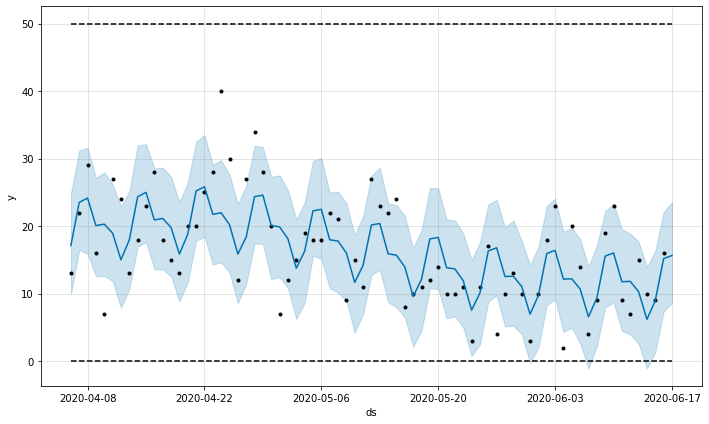

In [9]:
fig = model.plot(forecast)

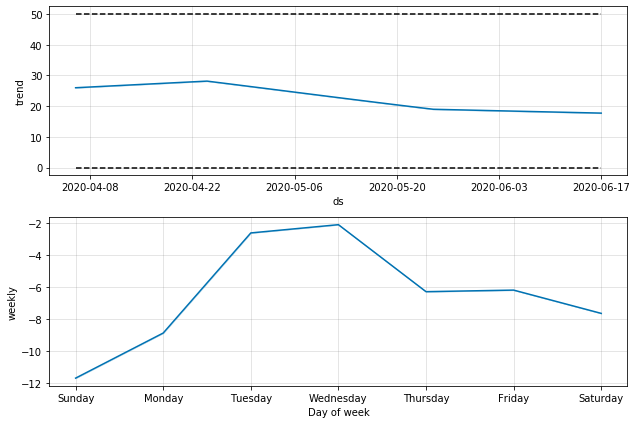

In [10]:
fig = model.plot_components(forecast)

### Model performance

In [11]:
results = cross_validation(model, initial = '60 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 11 forecasts with cutoffs between 2020-06-05 00:00:00 and 2020-06-15 00:00:00


In [12]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-06,6.863989,-0.598038,15.007222,14.0,2020-06-05
1,2020-06-07,3.911840,-4.226513,11.464578,4.0,2020-06-06
2,2020-06-08,6.792634,-0.935743,14.505508,9.0,2020-06-07
3,2020-06-09,12.514679,4.778225,20.202562,19.0,2020-06-08
4,2020-06-10,12.917575,5.486376,21.065515,23.0,2020-06-09
5,2020-06-11,10.195622,2.228770,18.194374,9.0,2020-06-10
6,2020-06-12,10.279220,2.204497,18.150292,7.0,2020-06-11
7,2020-06-13,7.395941,-0.275150,15.110204,15.0,2020-06-12
8,2020-06-14,3.673576,-3.621526,10.959913,10.0,2020-06-13
9,2020-06-15,8.774073,1.581354,16.090813,9.0,2020-06-14


In [13]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,28.242964,5.314411,4.151615,0.307958,0.341333,0.909091


### Tomorrow prediction

In [14]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

16